In [ ]:
!pip install matplotlib

In [8]:
import pandas as pd
from clearml import Task
# Fetch the task by ID
task = Task.get_task(task_id="153a25c889fc4147b801becd4f2a1577")

# Retrieve logged data
logged_data = task.get_all_reported_scalars()

In [9]:
def get_dataframe(key):
    res = {k : pd.Series(logged_data[key][k]['y']) for k in logged_data[key].keys()}
    return pd.DataFrame(res)

In [17]:
train_log = get_dataframe('train')
train_log.iloc[::10, :]

,loss,grad_norm,learning_rate
0,1.8122,0.473018,0.000006
10,1.3482,0.998027,0.000019
20,1.2939,1.263596,0.000018
30,1.1387,1.679024,0.000017
40,1.2139,1.710629,0.000015


<Axes: >

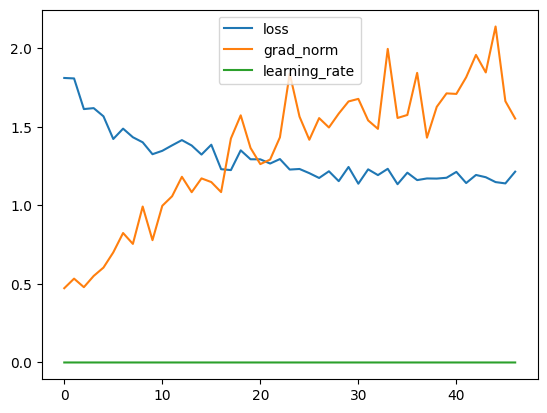

In [15]:
train_log.plot()

In [12]:
eval_log = get_dataframe('eval')
eval_log

,loss,bleu,rouge1,rouge2,rougeL,f1,runtime,samples_per_second,steps_per_second
0,0.594393,0.860073,0.944676,0.873531,0.856740,0.858403,1816.4596,0.366,0.366
1,0.576954,0.860576,0.945251,0.873415,0.857215,0.858892,1798.4670,0.369,0.369


<Axes: >

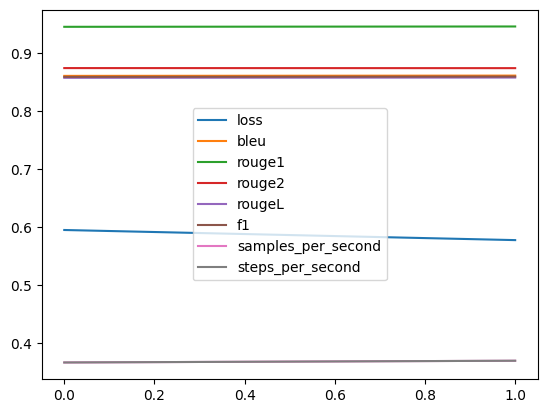

In [13]:
eval_log.drop('runtime', axis=1).plot()

In [ ]:
# Export to CSV
df.to_csv("train_data.csv", index=False)